In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import intake

In [2]:
url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)

In [3]:
cat_ta = col.search(experiment_id=['historical'],
                institution_id = 'NCAR',
                source_id = 'CESM2-WACCM',
                variable_id='ta', # choose air temperature (ta) as our variable
                table_id= 'Amon', # monthly mean data
                member_id = 'r1i1p1f1'
                )

In [4]:
dset_dict = cat_ta.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
for name, ds in dset_dict.items():
    print(name)
    ds_ta = dset_dict[name]

CMIP.NCAR.CESM2-WACCM.historical.Amon.gn


In [6]:
ta_100 = ds_ta['ta'].isel(lat=96, plev=18, member_id=0).mean(dim='lon').compute()

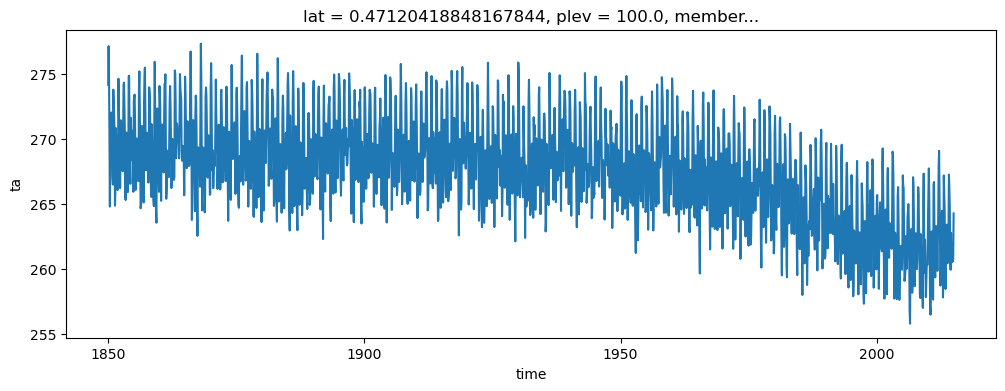

In [7]:
ta_100.plot(figsize=(12,4))
plt.show()

In [8]:
ta_100

<xarray.DataArray 'ta' (time: 1980)>
array([274.18204, 277.16296, 274.9101 , ..., 260.5703 , 260.7562 ,
       264.27374], dtype=float32)
Coordinates:
    lat        float64 0.4712
    plev       float64 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    member_id  <U8 'r1i1p1f1'